# RandomFlorest Classifier
**Este projeto visa prever se um cliente será um bom pagador com base em uma tabela de atributos, que inclui informações como posse de casa, estado civil, renda e histórico de pagamentos. Para alcançar esse objetivo, será aplicado o algoritmo Random Forest Classifier. **

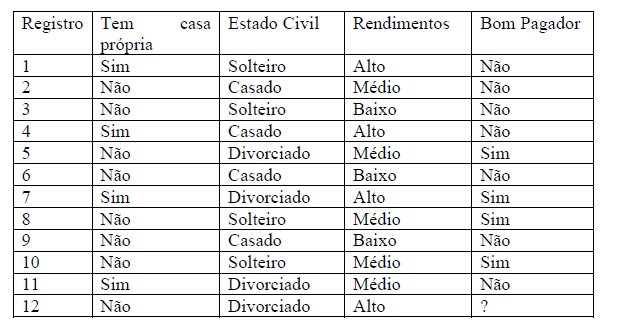

**Legenda e rotulos**

*   Tem casa propria : 0-Não,  1-Sim
*   Estado civil : 0-Solteiro , 1-Casado  , 2-Divorciado
*   Rendimento : 0-Baixo, 1-Medio , 2-Baixo  
*   Bom Pagador : 0-Não, 1-Sim  





In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X_train = np.array([[1, 0, 2], [0, 1, 1], [0, 0, 0], [1, 1, 2], [0, 2, 1], [0, 1, 0], [1, 2, 2], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 2, 2]])
y_train = np.array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [2]:
# Definindo arquitetura do modelo
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Visualizando caracteristicas mais importantes para o modelo

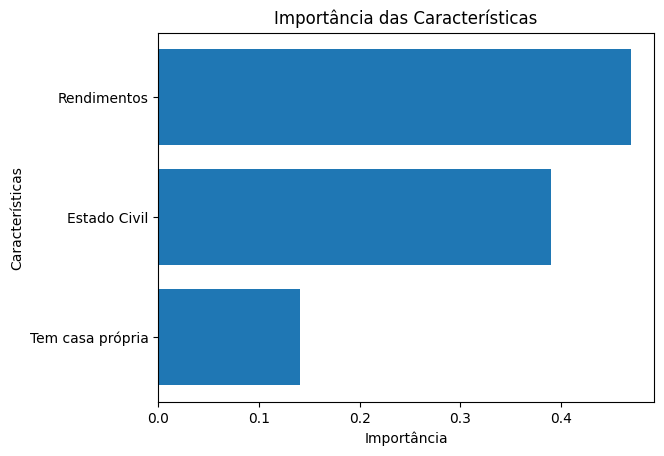

In [3]:
# Obtendo a importância das características
importances = random_forest.feature_importances_
feature_names = ['Tem casa própria', 'Estado Civil', 'Rendimentos']

# Criando um gráfico de barras para visualizar a importância das características
plt.barh(feature_names, importances)
plt.xlabel('Importância')
plt.ylabel('Características')
plt.title('Importância das Características')
plt.show()

## Visualização de árvores de decisão

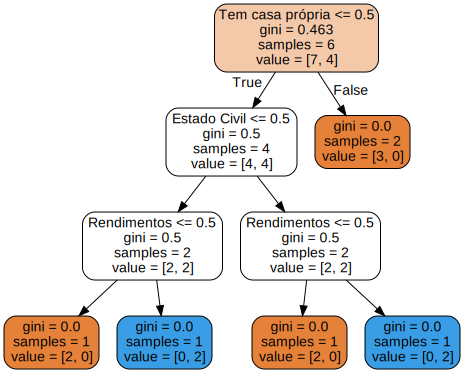

In [4]:
from sklearn.tree import export_graphviz
import graphviz

tree = random_forest.estimators_[0]
export_graphviz(tree, out_file='tree.dot', feature_names=feature_names, filled=True, rounded=True)
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


## Fazendo Previsão

In [5]:
predictions = random_forest.predict([[0,2,2]])
if predictions == 0:
  print(f'classe { predictions } : O cliente não é um bom pagador')
print(f'classe { predictions } : O cliente é um bom pagador')

classe [1] : O cliente é um bom pagador


**Realizando a previsão concluimos que para as condiçoes de entrada o cliente será um bom pagador**

# Classificação RandomFlorest

**Este projeto busca utilizar o algoritmo Random Forest para classificar pontos em um espaço bidimensional. O problema consiste em cinco classes, onde as classes de 0 a 3 representam os pontos dentro da interseção dos semicírculos, enquanto a classe 4 engloba todos os pontos fora dessa região. O espaço de análise é o plano cartesiano R^2, com coordenadas variando de -1 a 1. O objetivo é empregar o Random Forest para classificar eficientemente os pontos em suas respectivas categorias. **

### ilustrando sintuação-problema e definição das classes
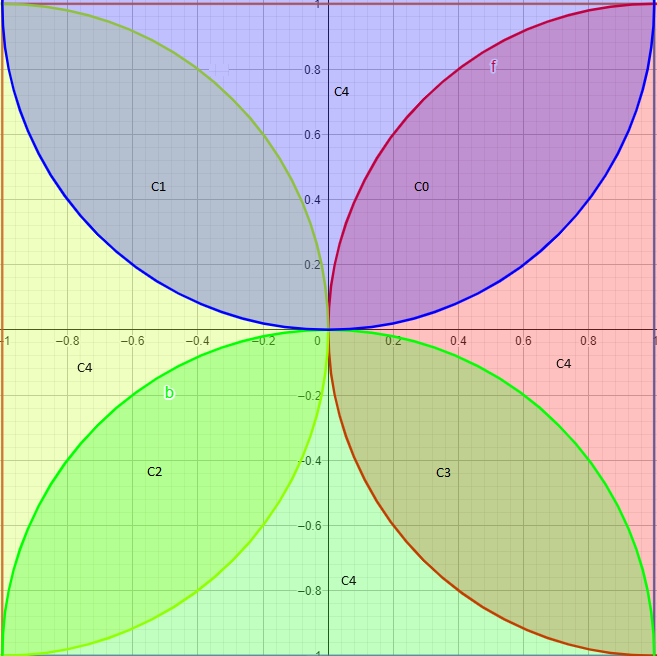

### Gerando valores igualmente espaçados para posições no espaço R^2


In [ ]:
import numpy as np
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
x_coords,y_coords = np.meshgrid(x,y)

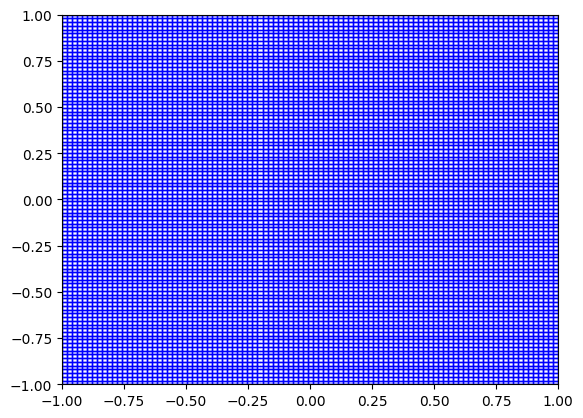

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_coords, y_coords, marker='+', color='blue', linestyle='none')
plt.axis([-1, 1, -1, 1])
plt.show()

In [ ]:
points = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)


### Função para rotular os pontos

In [ ]:
# Funções para rotular os ponto de acordo com as classes definida no exercicio
def vermelha(x,y):
  if (x-1)**2+y**2<=1:
    return 1
  else:
    return 0

def amarela(x,y):
  if (x+1)**2+y**2<=1:
    return 1
  else:
    return 0

def verde(x,y):
  if x**2+(y+1)**2<=1:
    return 1
  else:
    return 0

def azul(x,y):
  if x**2+(y-1)**2<=1:
    return 1
  else:
    return 0


### Popular vetor de label


In [ ]:
label = []
for x_i, y_i in points:
  if vermelha(x_i, y_i) & azul(x_i, y_i):
    label.append(0)
  elif azul(x_i, y_i) & amarela(x_i, y_i):
     label.append(1)
  elif amarela(x_i, y_i) & verde(x_i, y_i):
     label.append(2)
  elif verde(x_i, y_i) & vermelha(x_i, y_i):
    label.append(3)
  else:
    label.append(4)


### Verificando e visualizando distribuição dos rotulos

0    1396
1    1396
2    1396
3    1396
4    4416
Name: label, dtype: int64


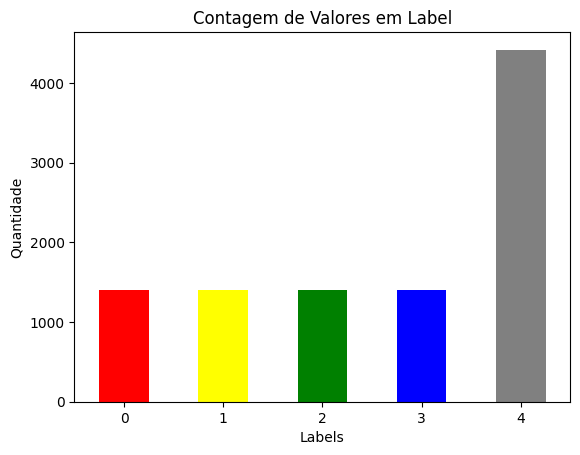

In [ ]:
import pandas as pd
df = pd.DataFrame({'label': label})
counts = df['label'].value_counts().sort_index()
print(counts)
counts.plot(kind='bar', color=['red', 'yellow', 'green', 'blue', 'gray'])
plt.xlabel('Labels')
plt.ylabel('Quantidade')
plt.title('Contagem de Valores em Label')
plt.xticks(rotation=0)
plt.show()


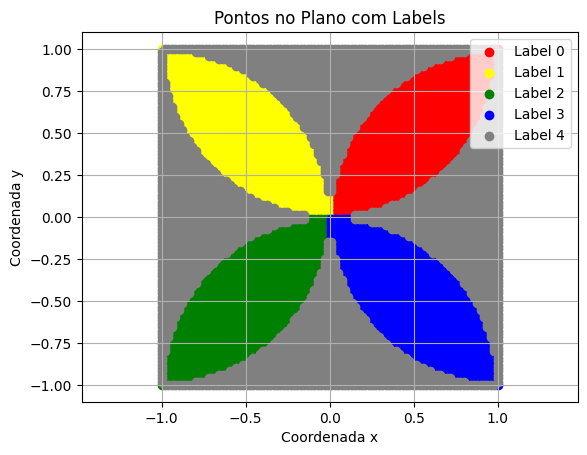

In [ ]:
# Separando os pontos de acordo com as labels
points_0 = [points[i] for i in range(len(label)) if label[i] == 0]
points_1 = [points[i] for i in range(len(label)) if label[i] == 1]
points_2 = [points[i] for i in range(len(label)) if label[i] == 2]
points_3 = [points[i] for i in range(len(label)) if label[i] == 3]
points_4 = [points[i] for i in range(len(label)) if label[i] == 4]

# Plotando os pontos
plt.scatter(*zip(*points_0), color='red', label='Label 0')
plt.scatter(*zip(*points_1), color='yellow', label='Label 1')
plt.scatter(*zip(*points_2), color='green', label='Label 2')
plt.scatter(*zip(*points_3), color='blue', label='Label 3')
plt.scatter(*zip(*points_4), color='gray', label='Label 4')

plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Pontos no Plano com Labels')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


### Preparando dados para treinamento

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(points, label, test_size=0.2, stratify=label) #stratify usado para manter a mesma proporção entre os conjuntos, visto que os dados são desbalanceados
print(f'Numero de elementos para treino {len(x_train)}')
print(f'Numero de elementos para teste {len(x_test)}')

Numero de elementos para treino 8000
Numero de elementos para teste 2000


### Aplicando o Random-Florest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

random_forest = RandomForestClassifier(n_estimators=200, random_state=42)
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 0.9695


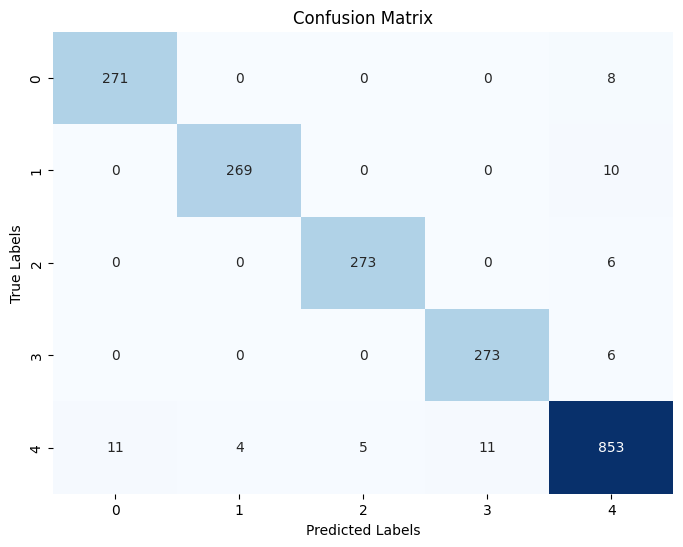

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Random Forest regressor
**Este projeto visa prever os preços de casas utilizando um modelo de regressão. A base de dados contém vários atributos relacionados às características das casas. Nosso objetivo é processar esses dados e construir um modelo de regressão utilizando o algoritmo Random Forest Regression. Este modelo será capaz de prever o valor de venda das casas com base nas características fornecidas.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


%matplotlib inline

In [ ]:
df = pd.read_csv('Housing.csv', encoding='latin-1')
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

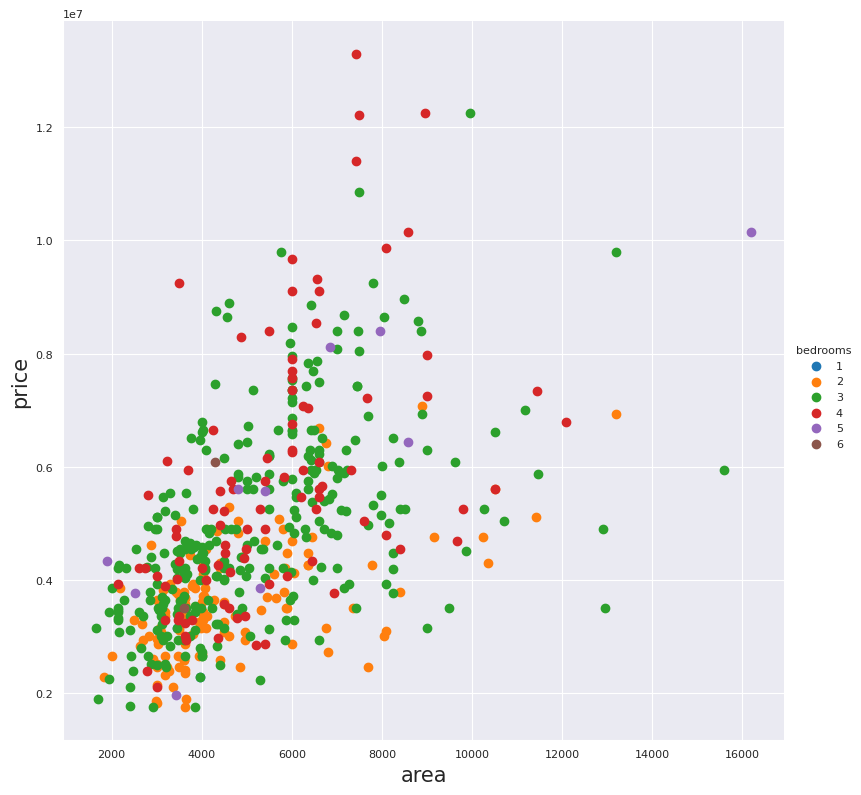

In [ ]:
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':15})
sns.set_style('darkgrid')
sns.FacetGrid(df, hue='bedrooms', height=8)\
.map(plt.scatter, 'area', 'price')\
.add_legend()

plt.show()

### Tratando as colunas categoricas e tranformando em valores binario

In [ ]:
categories = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

df[categories]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [ ]:
df[categories] = df[categories].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df[categories]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [ ]:
status = pd.get_dummies(df['furnishingstatus'])

# Convertendo os dados para base binaria 0 ou 1
status = status.astype(int)
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [ ]:
# status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [ ]:
df = pd.concat([df, status], axis = 1)
df = df.drop(columns=['furnishingstatus'], errors='ignore')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

### Normalizando os Dados

In [ ]:
# Normalização dos dados
scaler = MinMaxScaler()
scaler.fit(df[['price']])

df['price_class'] = scaler.transform(df[['price']]).round(3)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,price_class
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,1.000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,0.909
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,0.909
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,0.906
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,0.836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1,0.006
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0,0.001
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1,0.000
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0,0.000


In [ ]:
df = df.drop(columns=['price'], errors='ignore')
df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,price_class
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,1.000
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,0.909
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,0.909
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,0.906
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,0.836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0,0,1,0.006
541,2400,3,1,1,0,0,0,0,0,0,0,0,1,0,0.001
542,3620,2,1,1,1,0,0,0,0,0,0,0,0,1,0.000
543,2910,3,1,1,0,0,0,0,0,0,0,1,0,0,0.000


In [ ]:
# x recursos, y target
X = df.drop(columns=['price_class']).values
Y = df['price_class'].values
print(X.shape)
print(Y.shape)


(545, 14)
(545,)


### Separando Dados de treino e Teste. Definindo modelo

In [ ]:
# Separação de dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
rf_regression = RandomForestRegressor(n_estimators=700, max_depth=10)
rf_regression.fit(X_train, y_train)



RandomForestRegressor(max_depth=10, n_estimators=700)

In [ ]:
# Faça previsões nos dados de treinamento
train_predictions = rf_regression.predict(X_train)

# Calculo do erro de treinamento (MAE e MSE)
mae_train = mean_absolute_error(y_train, train_predictions)
mse_train = mean_squared_error(y_train, train_predictions)

print("Erro de Treinamento (MAE):", mae_train)
print("Erro de Treinamento (MSE):", mse_train)

Erro de Treinamento (MAE): 0.027363190228248496
Erro de Treinamento (MSE): 0.0013639387410578619


In [ ]:
# previsões nos dados de teste
test_predictions = rf_regression.predict(X_test)

# Calcule o erro de teste (MAE e MSE)
mae_test = mean_absolute_error(y_test, test_predictions)
mse_test = mean_squared_error(y_test, test_predictions)

print("Erro de Teste (MAE):", mae_test)
print("Erro de Teste (MSE):", mse_test)

Erro de Teste (MAE): 0.08748415967121452
Erro de Teste (MSE): 0.014600137523185211


In [ ]:
# Retornando ao dados originais
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
test_predictions_original = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()


In [ ]:
test_predictions_original[1]

7014651.603012306

In [ ]:
y_test_original[1]

6647200.000000001

### Plotando Grafico de Previsão do Modelo com os Dados de teste

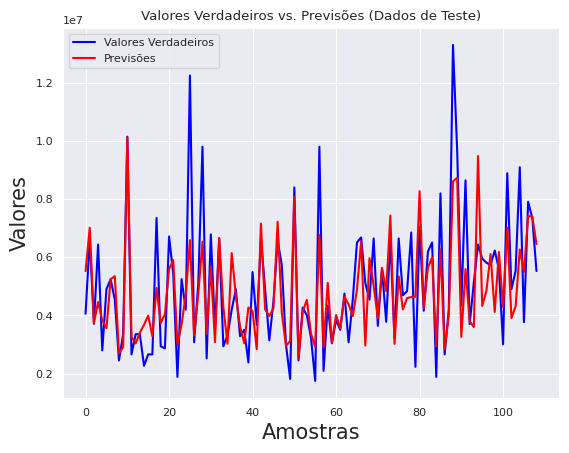

In [ ]:
# Criar um array de índices espaçados para representar as amostras
indices = range(len(y_test_original))

# Plotar os valores verdadeiros e previstos com linhas simples
plt.plot(indices, y_test_original, color='blue', label='Valores Verdadeiros')
plt.plot(indices, test_predictions_original, color='red', label='Previsões')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.title('Valores Verdadeiros vs. Previsões (Dados de Teste)')
plt.legend()
plt.show()